# Exploratory Data Analysis (EDA) For Predicting Hotel Booking Cancellations Using Machine Learning

Booking cancellations have a substantial impact in demand management decisions in the hospitality industry. Every year, more than 140 million bookings were made on the internet and many hotel bookings were made through top-visited travel websites like Booking.com, Expedia, Hotels.com, etc.

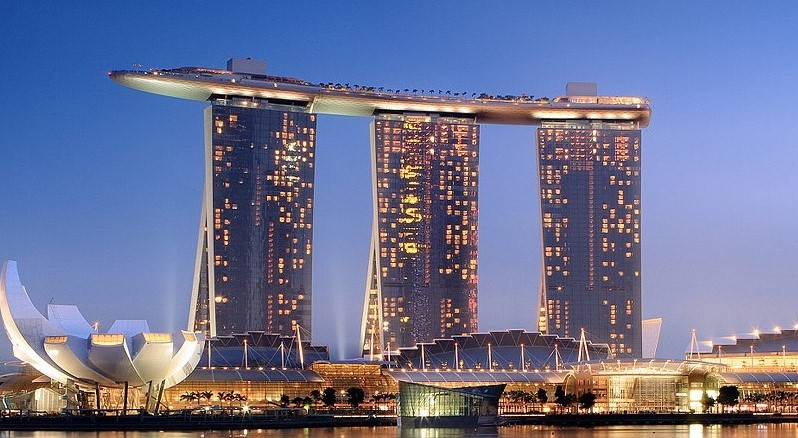

## Hotel Booking Cancellations, A Growing Problem...

When Analyzing the past 5 years data, the D-Edge Hospitality Solutions has found that the global average of cancellation rate on bookings has reached **almost 40%** and this trend produces a very negative impact on hotel revenue and distribution management strategies.

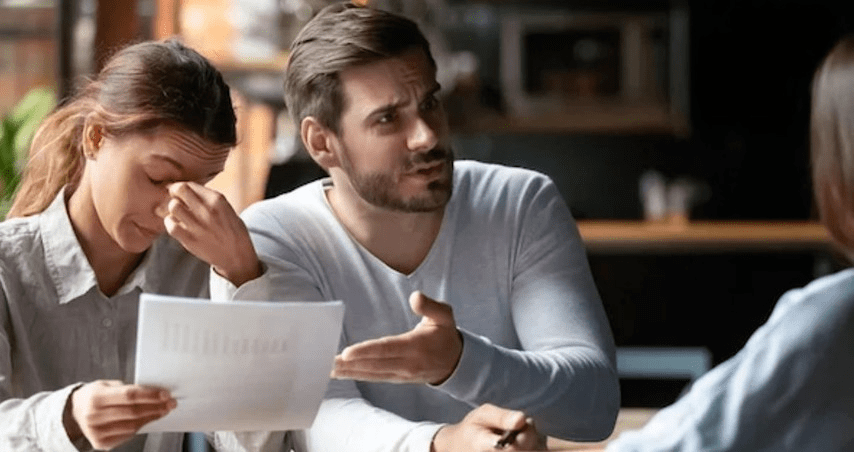

To overcome the problems caused by booking cancellations, hotels implement rigid cancellation policies, inventory allocation and overbooking strategies, which can also have a negative influence on revenue and reputation.

Once the reservation has been cancelled, there is almost nothing to be done and it creates a discomfort for many Hotels and Hotel Technology companies. **Therefore, predicting reservations which might get cancelled and preventing these cancellations will create a surplus revenue for both Hotels and Hotel Technology companies.**

## Motivation

 **Have you ever wondered when is the best time in a year to book a hotel room is? What if there was a way you could predict which guests were likely to cancel and adjust the overbook rate accordingly? That would be great right?**

**Luckily, by using Machine learning with Python, we can predict the guests who are likely to cancel the reservation and this could help produce better forecasts and reduce uncertainty in business decisions.**

In this article, I will apply **Exploratory Data Analysis (EDA)** to get insights from the data set and to know which features have  contributed more in predicting cancellations by performing **Data visualization.** It is always a good practice to understand the data first and try to gather as many insights from it.

**Exploratory Data Analysis (EDA) is all about making sense of data in hand, before getting them dirty with it. It is an approach for summarizing, visualizing, and becoming  familiar with the important features of a data set.**

**Step 1 : Import all required machine learning libraries**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

**Step 2 : Load the dataset** [Hotel Dataset link](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

In [13]:
df = pd.read_csv('C:/Users/TT129/Desktop/bookings.csv')
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


**Step 3 : Exploratory Data Analysis (EDA)**

To better understand the dataset, we have to come up with a list of questions.

1.  Top 10 Countries of Origin of Hotel visitors (Guests)
2.  Which Month is the Most Occupied (busiest) with bookings at the Hotel
3.  How many bookings were cancelled at the Hotel
4.  Which month has highest number of cancellations
5.  How many bookings were cancelled by Hotel Type
6.  Relationship between ADR and Arrival month by booking cancellation status 
7.  Total number of bookings for each hotel
8.  Total number of bookings by Market Segment
9.  Total number of bookings by Customer type
10. Arrival_date_year vs lead_time with booking cancellation status.
11. Total Number of Special requests 
12. Relationship between total special requests and cancellations
13. Total nights spent at Hotels by Market Segment and Hotel Type
14. How does the Price Per Night (ADR) Vary Over the Year by Hotel Type
15. What is the effect of repeated guest on Cancellations
16. Total Number of bookings by deposit type
17. What is the Effect of deposit type on Cancellations
18. What is the Effect of Meal type on Cancellations
19. What is the Effect of required_car_parking_spaces on Cancellations
20. What is the Effect of booking changes (Modifications) on Cancellations

**Step 4 : Data Visualisation**

**1. Top 10 Countries of Origin of Hotel visitors (Guests)**

Text(0, 0.5, 'Reservation Count')

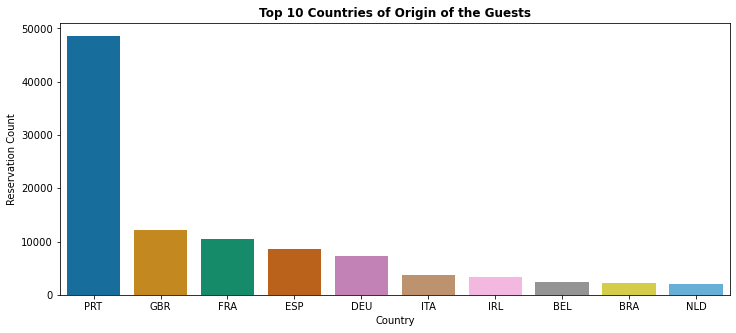

In [14]:
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

- **The above graph depicts information about the countries of origin of guests where the bookings were created.**
- **Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%)**

**2. Which Month is the Most Occupied (Busiest) with Bookings at the Hotel**

Text(0, 0.5, 'Reservation Count')

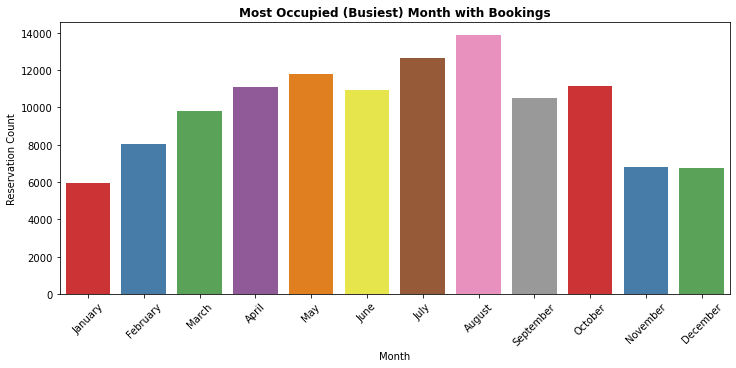

In [15]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.countplot(x='arrival_date_month', data = df,palette= 'Set1')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')

- **The above graph depicts the number of bookings created for each month.**
- <b>According to the graph, August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

**3. How many Bookings were Cancelled at the Hotel**

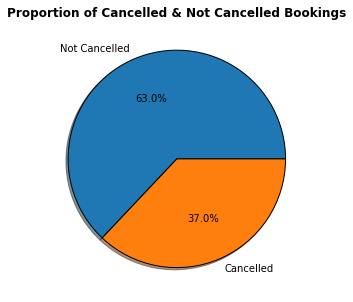

In [16]:
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

- **The above pie chart depicts proportion or percentage of cancelled & not cancelled bookings.**
- <b>According to the pie chart, 63% bookings were not cancelled and 37% of the bookings were cancelled at the Hotel.

**4.  Which Month has Highest Number of Cancellations By Hotel Type**

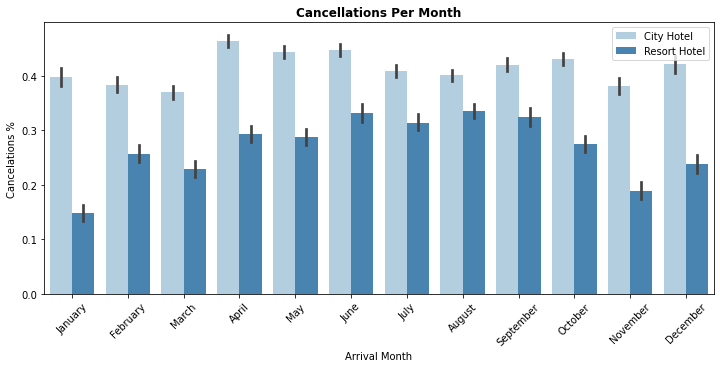

In [17]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'Blues')
plt.title("Cancellations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations %")
plt.legend(loc="upper right")
plt.show()

- **For the City hotel, the  number of cancelations per month is around 40 % throughout the year.**
- **For the Resort hotel, the cancellations are highest in the summer (June,July, August) and lowest during the winter (November, December, January).**
- **In short, the possibility of cancellation for resort hotels in winter is very low.**

**5. How many Bookings were Cancelled by Hotel Type**

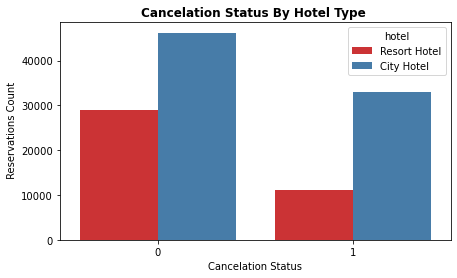

In [18]:
plt.figure(figsize = (7,4))
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Set1')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

- **For the Resort Hotel, total of 25.14% Bookings were cancelled**
- **For the City Hotel, total of 74.85% Bookings were cancelled**

**6. Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status**

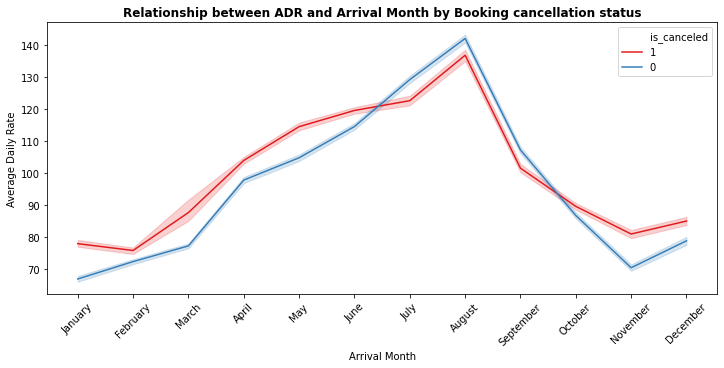

In [19]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()

- **The above line chart depicts arrival month "August" is the most occupied (Busiest) month of bookings.** 
- **The highest Average Daily Rate (ADR) has been occurred in same August month.** 
- **Due to Highest ADR in August may be it could be one of the reasons for more canceled bookings in August.**

**7. Total Number of Bookings for Each Hotel**

Text(0, 0.5, 'Reservation Count')

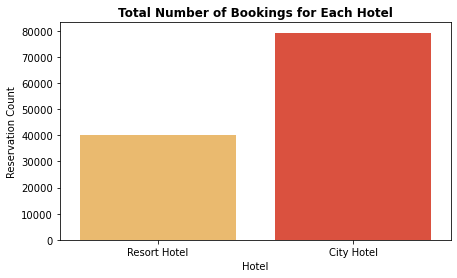

In [20]:
plt.figure(figsize = (7,4))
sns.countplot(x='hotel', data = df, palette='YlOrRd')
plt.title('Total Number of Bookings for Each Hotel', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

- **The above graph depicts that approximately 34% of the reservations were booked for Resort hotel and 66% were booked for City Hotel.**

**8. Total  Number of Bookings by Market Segment**

Text(0, 0.5, 'Reservation Count')

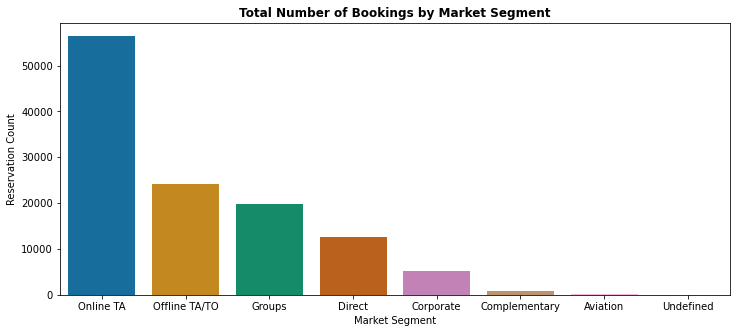

In [21]:
sns.countplot(df['market_segment'], palette='colorblind',order=pd.value_counts(df['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

- **The above graph depicts that 47.3% of bookings are made via Online Travel Agents**
- **Around 20% of bookings are made via Offline Travel Agents.**
- **Less than 20% of bookings made directly without any agents**

**9. Total Number of Bookings by Customer Type**

Text(0, 0.5, 'Reservation Count')

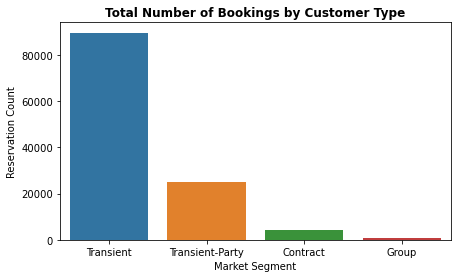

In [22]:
plt.figure(figsize= (7,4))
sns.countplot(df['customer_type'],order=pd.value_counts(df['customer_type']).index)
plt.title('Total Number of Bookings by Customer Type',weight = 'bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')

- **The above graph depicts that 75% of bookings were Transient Bookings, 21% bookings were Transient_Party bookings.**
- **Around 3% bookings were contract bookings.**

**10. Arrival Date Year vs Lead Time By Booking Cancellation Status**

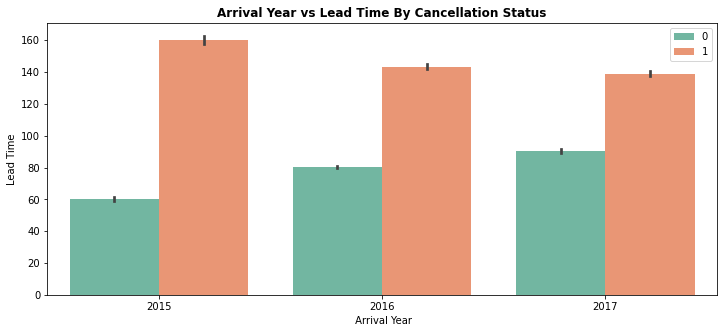

In [23]:
sns.barplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Set2")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

- **For all the 3 years, bookings with lead time less than 100 days has less chances of getting cancelled**
- **For all the 3 years, bookings with lead time more than 100 days has more chances of getting cancelled**

**11. Exploring Number of Special Requests**

Text(0, 0.5, 'Count')

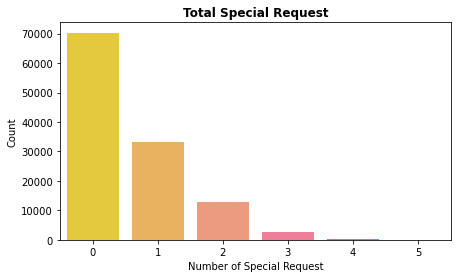

In [24]:
plt.figure(figsize = (7,4))
sns.countplot(x='total_of_special_requests', data=df, palette = 'spring_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

- **From the above graph we can depict that around 58.8% bookings do not have any special requests from the guests**

**12. Relationship between Special Requests and Cancellations**

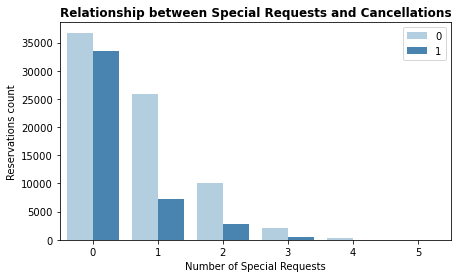

In [25]:
plt.figure(figsize = (7,4))
sns.countplot(x = "total_of_special_requests", hue = "is_canceled",data=df,palette= 'Blues')
plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

- **The Above graph depicts the relationship between total number of special requests and cancellation booking status.**
- **Around 28% of bookings were cancelled with no special requests from the guests followed by 6% bookings were cancelled with one special requests from the guests.**

**13. Total Nights Spent by Guests at the Hotel by Market Segment and Hotel Type**

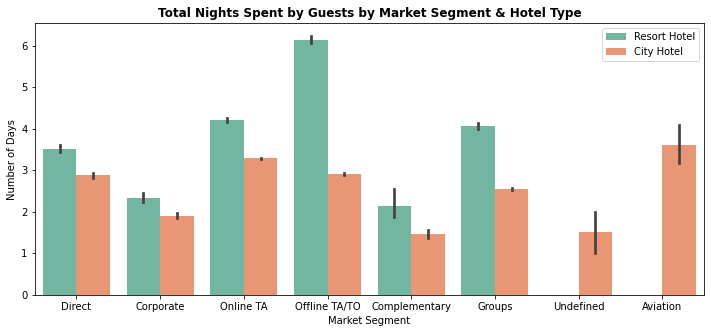

In [26]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights'] 
sns.barplot(x = "market_segment", y = "total_stay", data = df, hue = "hotel", palette = 'Set2')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

- **For City hotel, most of guests prefer to stay between 1-4 nights.**
- **For Resort hotel, most of the guests prefer to stay more than 3 nights. It is obvious that when guests go to resort hotels, they prefer to stay for longer days.**
- **Guests from Aviation Segment do not seem to be staying at the Resort hotels**

**14. How does the ADR Vary Over the Year by Hotel Type**

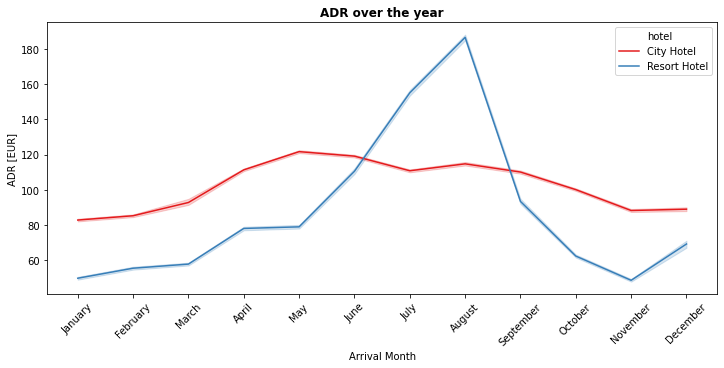

In [27]:
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("ADR over the year", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("ADR [EUR]")
plt.show()

- **For Resort Hotel, the price per night (ADR) is more expensive during July, August & September**
- **For City Hotel, the price per night (ADR) is slightly more during March, April & May**

**15.  What is the effect of repeated guest on Cancellations**

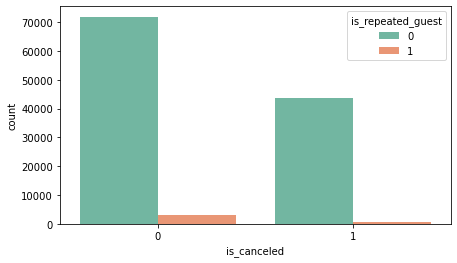

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Set2')

- **From the above graph, we can depict that most of the repeated guests do not cancel their reservations and its obvious.**

**16. Total Number of bookings by deposit type**

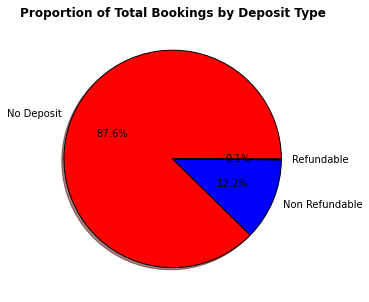

In [31]:
proportion = df['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
cols = ['red','blue','yellow']
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},colors =cols)
plt.show()

- **Around 87.6% bookings are booked without deposit**
- **Around 12.2% bookings are booked with Non Refundable Policy**
- **Around 0.1% bookings are booked with Refundable Policy**

**17. What is the Effect of Deposit Type on Cancellations**

Text(0, 0.5, 'Reservation Count')

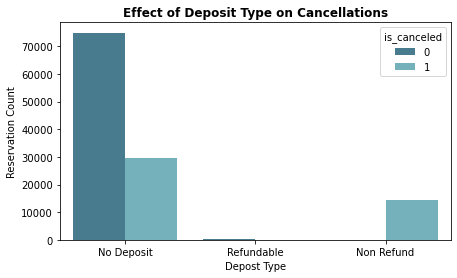

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'GnBu_d')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')

- **Around 28% bookings were cancelled by guests with no deposit, followed by 22% bookings were cancelled which are with Refundable policy**
- **So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations**


**18. What is the Effect of Meal type on Cancellations**

Text(0, 0.5, 'Reservation Count')

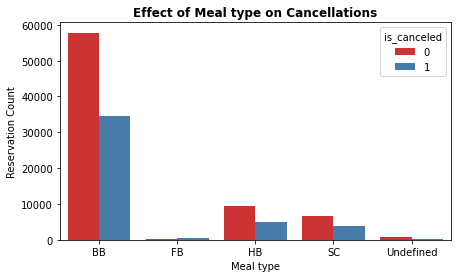

In [35]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'Set1')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

- **From the graph we can depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type.**
- **Around 37% bookings of "BB" meal type were cancelled by the guests.**

**19. What is the effect of Required_car_parking_spaces on Cancellations**

Text(0, 0.5, 'Reservation Count')

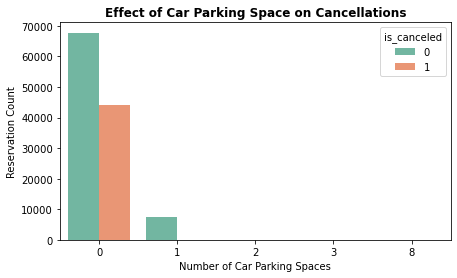

In [37]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'required_car_parking_spaces',hue = 'is_canceled',data = df,palette= 'Set2')
plt.title ('Effect of Car Parking Space on Cancellations',weight = 'bold')
plt.xlabel("Number of Car Parking Spaces")
plt.ylabel('Reservation Count')

- **Around 40% bookings were cancelled by guests who didnt opt for Car parking at the time of booking**

**20. What is the Effect of Booking Changes (Modifications) on Cancellations**

Text(0, 0.5, 'Reservation Count')

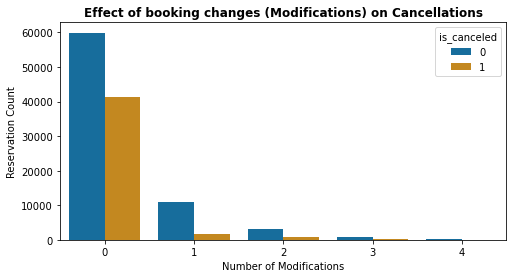

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,palette= 'colorblind')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')

- **Around 40% of bookings were cancelled by the guests when no modifications done**
- **Around 14% of bookings were cancelled by the guests when one modificationsification was done**

### Business Summary

**From our EDA, we have observed that the top 5 most important features in the data set which helps in predicting Cancellations are:**

1. Lead Time 
2. ADR 
3. Deposit Type
4. Arrival Day of the Month
5. Total Number of Special Requests.

### Stratagies to Counter High Cancellations at the hotel

1. Set Non-refundable Rates, Collect deposits and implementing more rigid cancellation policies
2. Using Advanced Purchase Rates with varying Lead Time windows
3. Encourage direct bookings by offering discounts
4. Hotels can take into account of total number of special requests to reduce the possibility of cancellations by improving customer service
5. Monitor where the cancellations are coming from such as Market Segment, distribution channels etc

### References

1. https://www.pegs.com/blog/how-hotels-can-counter-high-ota-cancellation-rates/
2. https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/
3. https://www.kaggle.com/jessemostipak/hotel-booking-demand